## **Inspect Model**

### **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\abell\Documents\aa_delft\J4\BEP\ai


In [2]:
%load_ext autoreload
%autoreload 2
import bep.utils as utils
from bep.dataset import bepDataset

### **Configurations**

In [3]:
import tdmms.tdmcoco as tdmcoco
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3  # thin, few, thick
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

### **Load data**

In [4]:
utils.check_dir_setup(ROOT_DIR, (0.8, 0.1, 0.1))

train, _, test = utils.load_train_val_datasets(ROOT_DIR)

split = bepDataset()
split.load_dir(os.path.join(ROOT_DIR, 'data'), 'batchsplit', reload_annotations=False)
split.prepare()

print("BEP Train NbSe2 images: {} | Classes: {}".format(len(train.image_ids), train.class_names))
print("BEP Test NbSe2 images: {} | Classes: {}".format(len(test.image_ids), test.class_names))
print("BEP Split NbSe2 images: {} | Classes: {}".format(len(split.image_ids), split.class_names))

Directory setup correctly
BEP Train NbSe2 images: 85 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Test NbSe2 images: 3 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Split NbSe2 images: 60 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [5]:
BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', '20241118-133739_nbse2_mos2_4_True_89_2__0096.h5')
# BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', '20241105-095909_nbse2_mos2_1_True_33_2__0014.h5')


model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='NbSe2 Fine-tuned Model')
print("NbSe2 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
NbSe2 Model, loading weights c:\Users\abell\Documents\aa_delft\J4\BEP\ai\weights\20241118-133739_nbse2_mos2_4_True_89_2__0096.h5


### **Run Model**

In [6]:
run_model = utils.runModel(model_NbSe2, config, plot_size=15)

In [7]:
# run_model.run(dataset=split, rand=True)

Running on:
{'id': 23121, 'source': 'ali', 'path': 'c:\\Users\\abell\\Documents\\aa_delft\\J4\\BEP\\ai\\data\\images\\batchsplit\\67_sio2_NbSe2_Exfoliation_B2-52_f3_img_split_121.png', 'width': 3088, 'height': 2076, 'annotations': [{'id': 121122, 'image_id': '67_sio2_NbSe2_Exfoliation_B2-52_f3_img_split_121.png', 'category_id': 2, 'segmentation': [[1499.965, 760.75, 1494.715, 759.5, 1482.715, 755.25, 1477.715, 755.5, 1474.715, 761.0, 1472.965, 757.0, 1472.215, 751.25, 1473.215, 746.0, 1476.715, 742.0, 1481.465, 741.0, 1486.465, 742.75, 1490.715, 746.75, 1494.465, 751.5, 1497.965, 756.5, 1499.965, 760.75]], 'area': 555.0, 'bbox': [1472.215, 741.0, 27.75, 20.0], 'iscrowd': 0, 'source': 'ali'}, {'id': 121121, 'image_id': '67_sio2_NbSe2_Exfoliation_B2-52_f3_img_split_121.png', 'category_id': 3, 'segmentation': [[1483.215, 755.5, 1494.715, 760.0, 1502.465, 761.5, 1506.215, 764.25, 1506.465, 770.5, 1506.965, 778.0, 1508.965, 782.0, 1514.215, 785.25, 1518.215, 787.25, 1519.965, 789.75, 1513.2

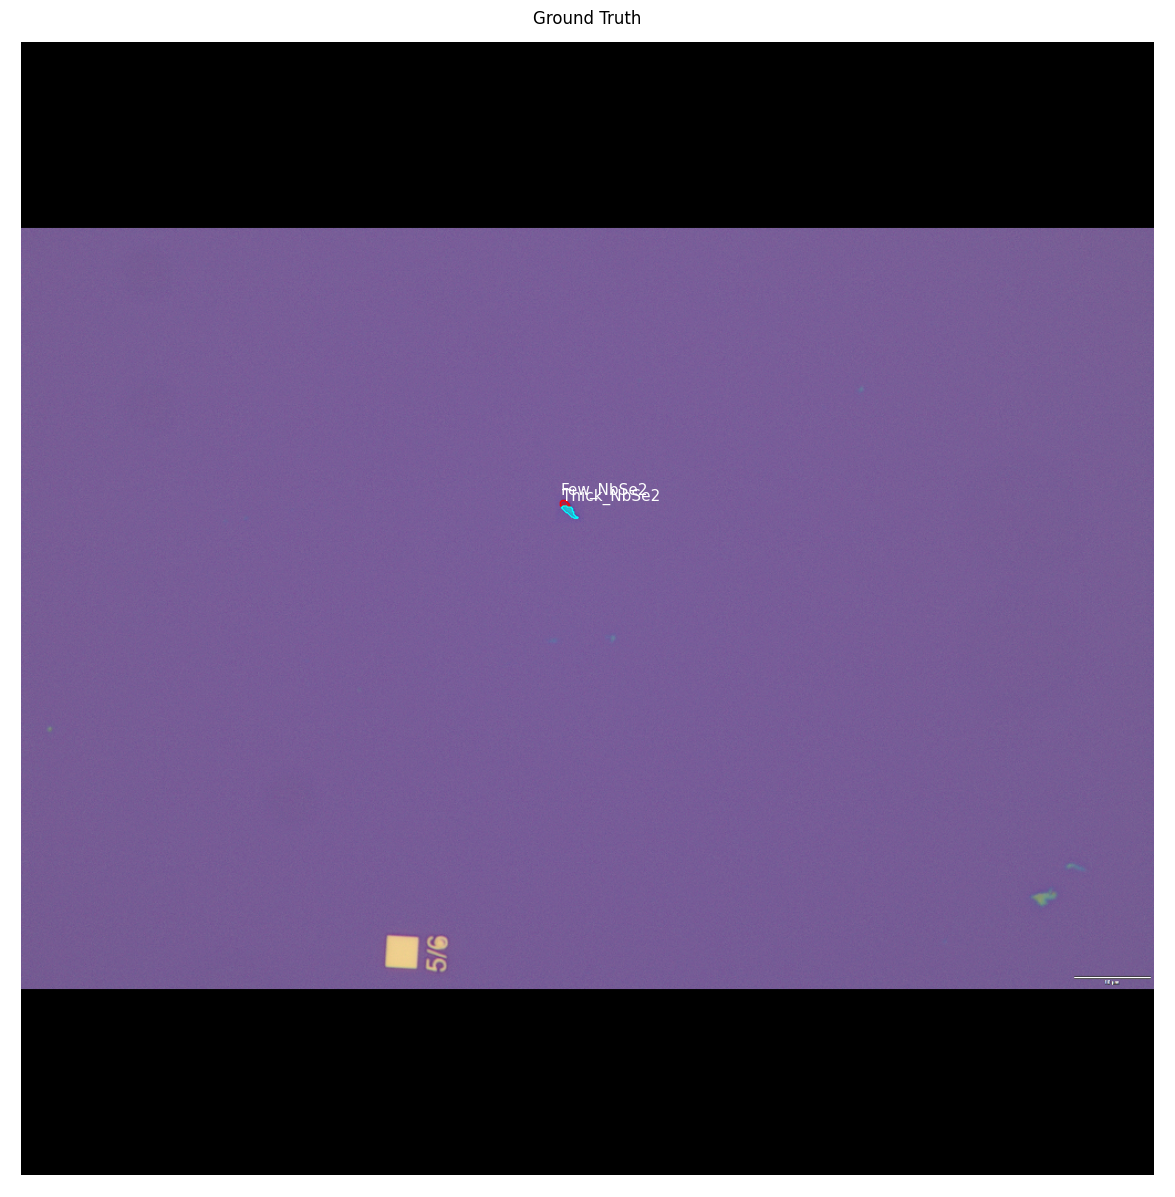

In [28]:
run_model.gt(dataset=split, iterate=True, show_bbox=False)